# An example of how to test our IForestASD Implementation & Compare the two versions of IForestASD regarding the drift detection (IForestASD ADWIN VS IForestASD AnomalyRate)

## Install skmultiflow if needed
You need to install git

In [1]:
try:
    import skmultiflow
except ImportError as e:
    print("scikit-multiflow package installation")
    !pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

## Importations and configurations

In [2]:
%matplotlib notebook
import matplotlib as plt
plt.interactive(True)
from source import functions
func = functions.Comparison()
import datetime

## General parameters for the evaluation

In [3]:
#window_sizes = [50, 100, 500, 1000]
#n_estimators = [30, 50, 100]
window = 100
n_estimator = 30
anomaly_threshold = 0.5
max_sample = 400 # We have gotten the size of the min dataset (Shuttle) to evaluate all dataset on the same basis.
n_wait = max_sample # The evaluation step size
# Used metric in the evaluation. Attention to use the metrics availlable in skmultiflow
metrics=['accuracy', 'f1', 'precision', 'recall', 'true_vs_predicted', 'kappa', 'kappa_m', 'running_time', 'model_size'] 

## Generate ConceptDrift Stream Dataset


******************************** Window = 100 and n_estimator = 30 ********************************


<IPython.core.display.Javascript object>


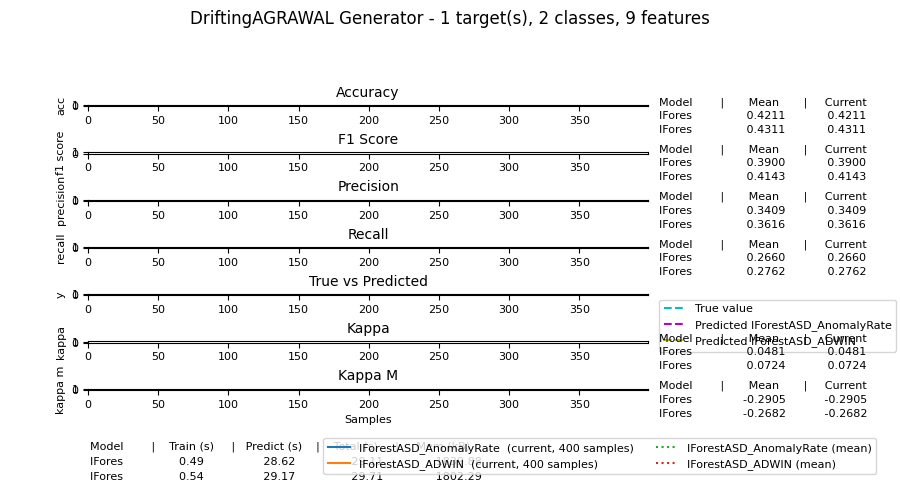

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.05s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:361: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 #################### [100%] [59.00s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.4211
IForestASD_AnomalyRate - Kappa        : 0.0481
IForestASD_AnomalyRate - Kappa M      : -0.2905
IForestASD_AnomalyRate - Precision: 0.3409
IForestASD_AnomalyRate - Recall: 0.2660
IForestASD_AnomalyRate - F1 score: 0.3900
IForestASD_AnomalyRate - Training time (s)  : 0.49
IForestASD_AnomalyRate - Testing time  (s)  : 28.62
IForestASD_AnomalyRate - Total time    (s)  : 29.11
IForestASD_AnomalyRate - Size (kB)          : 1839.8838
IForestASD_ADWIN - Accuracy     : 0.4311
IForestASD_ADWIN - Kappa        : 0.0724
IForestASD_ADWIN - Kappa M      : -0.2682
IForestASD_ADWIN - Precision: 0.3616
IForestASD_ADWIN - Recall: 0.2762
IForestASD_ADWIN - F1 score: 0.4143
IForestASD_ADWIN - Training time (s)  : 0.54
IForestASD_ADWIN - Testing time  (s)  : 29.17
IForestASD_ADWIN - Total time    (s)  : 29.71
IForestASD_ADWIN - Size (kB)          : 1802.2920

Please find evaluation r

In [4]:
dataset_name = "DriftStreamGenerator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.7
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0, noise_percentage=0.7, random_state=1,
                         drift_classification_function = 3, drift_random_state = 112, drift_noise_percentage = 0.0,
                          drift_start_position = 100, drift_width = 50, n_num_features = 2, n_cat_features = 0)
#func.save_stream_data_generated(data=stream, result_folder=test_name)
print("")
print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
func.run_IForestASD_comparison(stream=stream, stream_n_features=stream.n_features, window = window, 
                     estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                     result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics)


******************************** Window = 100 and n_estimator = 30 ********************************


<IPython.core.display.Javascript object>


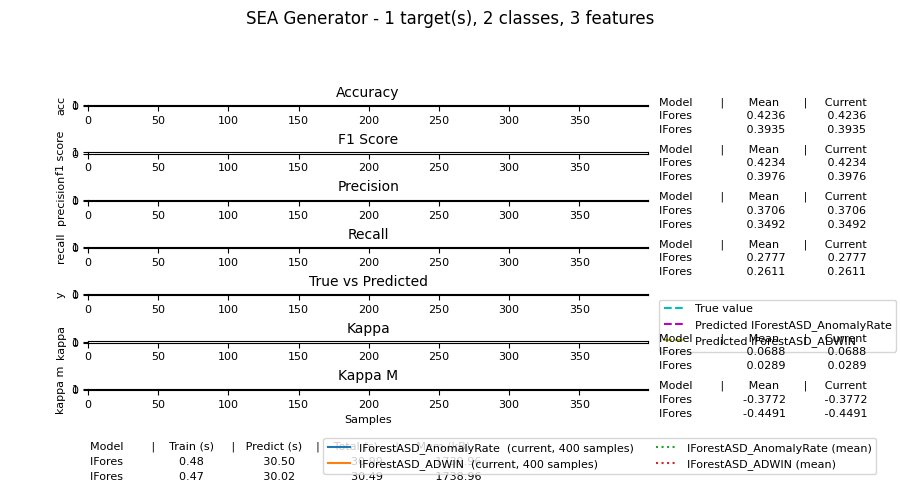

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:361: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 #################### [100%] [61.55s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.4236
IForestASD_AnomalyRate - Kappa        : 0.0688
IForestASD_AnomalyRate - Kappa M      : -0.3772
IForestASD_AnomalyRate - Precision: 0.3706
IForestASD_AnomalyRate - Recall: 0.2777
IForestASD_AnomalyRate - F1 score: 0.4234
IForestASD_AnomalyRate - Training time (s)  : 0.48
IForestASD_AnomalyRate - Testing time  (s)  : 30.50
IForestASD_AnomalyRate - Total time    (s)  : 30.99
IForestASD_AnomalyRate - Size (kB)          : 1739.9580
IForestASD_ADWIN - Accuracy     : 0.3935
IForestASD_ADWIN - Kappa        : 0.0289
IForestASD_ADWIN - Kappa M      : -0.4491
IForestASD_ADWIN - Precision: 0.3492
IForestASD_ADWIN - Recall: 0.2611
IForestASD_ADWIN - F1 score: 0.3976
IForestASD_ADWIN - Training time (s)  : 0.47
IForestASD_ADWIN - Testing time  (s)  : 30.02
IForestASD_ADWIN - Total time    (s)  : 30.49
IForestASD_ADWIN - Size (kB)          : 1738.9600

Please find evaluation r

In [5]:
dataset_name = "Generator"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.7
stream = func.get_dataset(dataset_name=dataset_name, classification_function=0,noise_percentage=0.7, random_state=1)
#func.save_stream_data_generated(data=stream, result_folder=test_name)
print("")
print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
func.run_IForestASD_comparison(stream=stream, stream_n_features=stream.n_features, window = window, 
                     estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                     result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics)

## Using Shuttle dataset

Dataset Name : Shuttle
Instances : 49097
Attributes : 9
Anomaly Percentage : 7.15%


******************************** Window = 100 and n_estimator = 30 ********************************


<IPython.core.display.Javascript object>


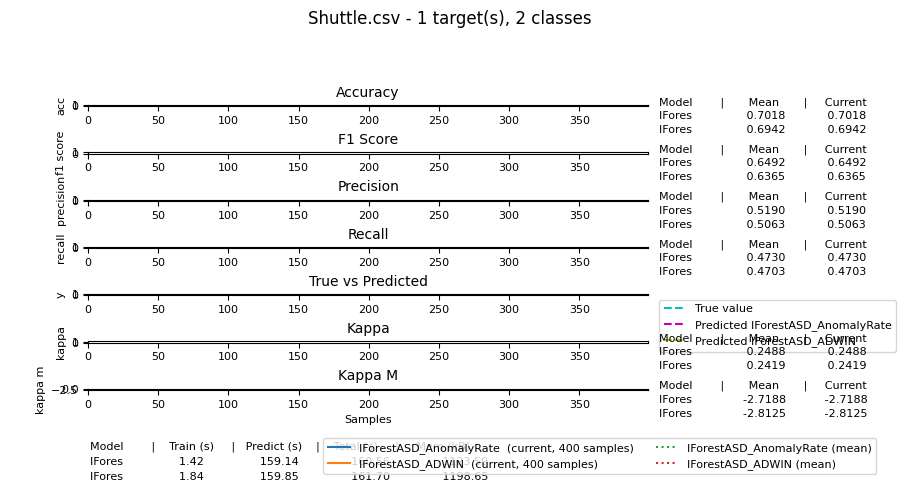

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.03s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:361: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 #################### [100%] [322.32s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.7018
IForestASD_AnomalyRate - Kappa        : 0.2488
IForestASD_AnomalyRate - Kappa M      : -2.7188
IForestASD_AnomalyRate - Precision: 0.5190
IForestASD_AnomalyRate - Recall: 0.4730
IForestASD_AnomalyRate - F1 score: 0.6492
IForestASD_AnomalyRate - Training time (s)  : 1.42
IForestASD_AnomalyRate - Testing time  (s)  : 159.14
IForestASD_AnomalyRate - Total time    (s)  : 160.56
IForestASD_AnomalyRate - Size (kB)          : 1123.5908
IForestASD_ADWIN - Accuracy     : 0.6942
IForestASD_ADWIN - Kappa        : 0.2419
IForestASD_ADWIN - Kappa M      : -2.8125
IForestASD_ADWIN - Precision: 0.5063
IForestASD_ADWIN - Recall: 0.4703
IForestASD_ADWIN - F1 score: 0.6365
IForestASD_ADWIN - Training time (s)  : 1.84
IForestASD_ADWIN - Testing time  (s)  : 159.85
IForestASD_ADWIN - Total time    (s)  : 161.70
IForestASD_ADWIN - Size (kB)          : 1198.6475

Please find evaluat

In [6]:
dataset_name = "Shuttle"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 7.15
stream = func.get_dataset(dataset_name=dataset_name)
#for window in window_sizes:
#    for n_estimator in n_estimators:
print("")
print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
func.run_IForestASD_comparison(stream=stream, stream_n_features=stream.n_features, window = window, 
                     estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                     result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics)

## Using SMTP dataset
   
Dataset Name : Smtp
Instances : 95156
Attributes : 3
Anomaly Percentage : 0.03%


******************************** Window = 100 and n_estimator = 30 ********************************


<IPython.core.display.Javascript object>


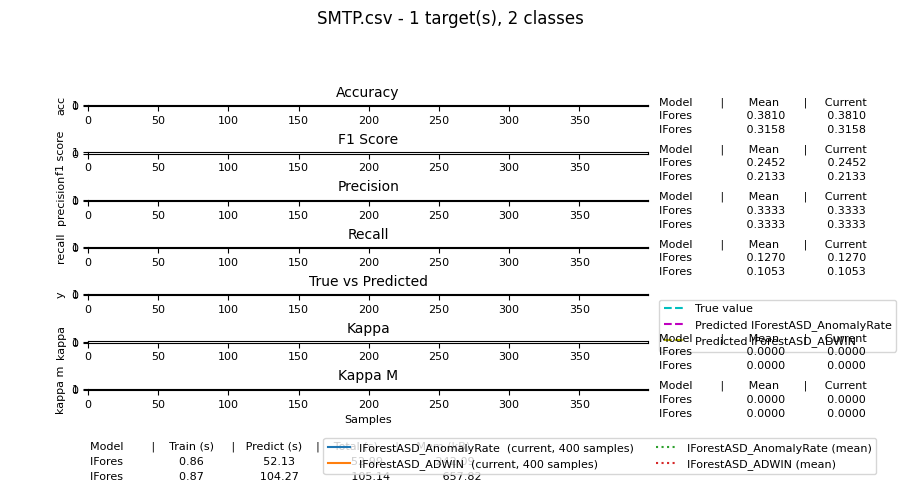

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.02s]
The model was updated by training a new iForest with the version : AnomalyRate


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:361: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 ##########---------- [50%] [36.46s]
The model was updated by training a new iForest with the version : AnomalyRate
 ###############----- [75%] [92.71s]
The model was updated by training a new iForest with the version : AnomalyRate
 #################### [100%] [158.19s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.3810
IForestASD_AnomalyRate - Kappa        : 0.0000
IForestASD_AnomalyRate - Kappa M      : 0.0000
IForestASD_AnomalyRate - Precision: 0.3333
IForestASD_AnomalyRate - Recall: 0.1270
IForestASD_AnomalyRate - F1 score: 0.2452
IForestASD_AnomalyRate - Training time (s)  : 0.86
IForestASD_AnomalyRate - Testing time  (s)  : 52.13
IForestASD_AnomalyRate - Total time    (s)  : 52.99
IForestASD_AnomalyRate - Size (kB)          : 242.0908
IForestASD_ADWIN - Accuracy     : 0.3158
IForestASD_ADWIN - Kappa        : 0.0000
IForestASD_ADWIN - Kappa M      : 0.0000
IForestASD_ADWIN - Precision: 0.3333
IForestASD_ADWIN - Recall: 0.1053
IForestASD_ADWIN -

In [8]:
dataset_name = "SMTP"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.03
stream = func.get_dataset(dataset_name=dataset_name)
#for window in window_sizes:
#    for n_estimator in n_estimators:
print("")
print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
func.run_IForestASD_comparison(stream=stream, stream_n_features=stream.n_features, window = window, 
                     estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                     result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics)

## Using ForestCover dataset
   
Dataset Name : ForestCover
Instances : 286048
Attributes : 10
Anomaly Percentage : 0.96%


******************************** Window = 100 and n_estimator = 30 ********************************


<IPython.core.display.Javascript object>


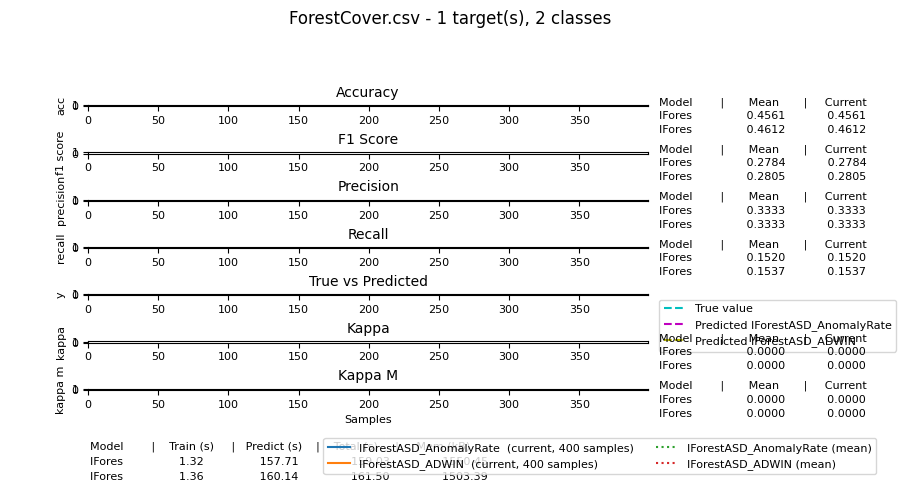

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #####--------------- [25%] [0.02s]

/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/skmultiflow/drift_detection/adwin.py:361: RuntimeWarning: invalid value encountered in sqrt
  epsilon = np.sqrt(2 * m * v * dd) + 1. * 2 / 3 * dd * m


 #################### [100%] [320.59s]
Processed samples: 400
Mean performance:
IForestASD_AnomalyRate - Accuracy     : 0.4561
IForestASD_AnomalyRate - Kappa        : 0.0000
IForestASD_AnomalyRate - Kappa M      : 0.0000
IForestASD_AnomalyRate - Precision: 0.3333
IForestASD_AnomalyRate - Recall: 0.1520
IForestASD_AnomalyRate - F1 score: 0.2784
IForestASD_AnomalyRate - Training time (s)  : 1.32
IForestASD_AnomalyRate - Testing time  (s)  : 157.71
IForestASD_AnomalyRate - Total time    (s)  : 159.03
IForestASD_AnomalyRate - Size (kB)          : 1550.4502
IForestASD_ADWIN - Accuracy     : 0.4612
IForestASD_ADWIN - Kappa        : 0.0000
IForestASD_ADWIN - Kappa M      : 0.0000
IForestASD_ADWIN - Precision: 0.3333
IForestASD_ADWIN - Recall: 0.1537
IForestASD_ADWIN - F1 score: 0.2805
IForestASD_ADWIN - Training time (s)  : 1.36
IForestASD_ADWIN - Testing time  (s)  : 160.14
IForestASD_ADWIN - Total time    (s)  : 161.50
IForestASD_ADWIN - Size (kB)          : 1503.3857

Please find evaluatio

In [9]:
dataset_name = "ForestCover"
test_name = dataset_name+'_'+str(datetime.datetime.now())
drift_rate = 0.96
stream = func.get_dataset(dataset_name=dataset_name)
#for window in window_sizes:
#    for n_estimator in n_estimators:
print("")
print("******************************** Window = "+str(window)+" and n_estimator = "+str(n_estimator)+" ********************************")
func.run_IForestASD_comparison(stream=stream, stream_n_features=stream.n_features, window = window, 
                     estimators = n_estimator, anomaly = anomaly_threshold, drift_rate = drift_rate, 
                     result_folder=test_name, max_sample=max_sample, n_wait=n_wait, metrics=metrics)